### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,w_castled_early,b_castled_early,w_checks_early,b_checks_early,early_checks,w_piece_activity,b_piece_activity,both_castled_early,total_captures_early,activity_diff
0,2487,2596,1,0,109,2541.5,0,-109,0,20.0,...,1.0,0.0,9.0,2.0,11.0,35.0,37.0,0,15.0,-2.0
1,2542,2433,2,0,109,2487.5,1,109,9,12.0,...,0.0,0.0,1.0,3.0,4.0,25.0,23.0,0,19.0,2.0
2,2404,2534,0,0,130,2469.0,0,-130,0,21.0,...,1.0,1.0,0.0,0.0,0.0,35.0,30.0,1,10.0,5.0
3,2752,2395,2,0,357,2573.5,1,357,0,16.0,...,0.0,1.0,0.0,1.0,1.0,32.0,26.0,0,17.0,6.0
4,2558,2685,2,0,127,2621.5,0,-127,1,28.0,...,1.0,0.0,0.0,0.0,0.0,38.0,33.0,0,9.0,5.0


### 2. Prepare data

In [3]:
X = df.drop(['ResultNumeric'], axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (2050967, 33)
Target: (2050967,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,                # Use all CPU cores
)

In [6]:
start_time = time.time()

rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 118.91 seconds (1.98 minutes)


### 5. Evaluate

In [7]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.6308 (63.08%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.61      0.70      0.65    164829
        Draw       0.80      0.29      0.42     71268
   White Win       0.63      0.70      0.66    174097

    accuracy                           0.63    410194
   macro avg       0.68      0.56      0.58    410194
weighted avg       0.65      0.63      0.62    410194



### 6. Confusion Matrix

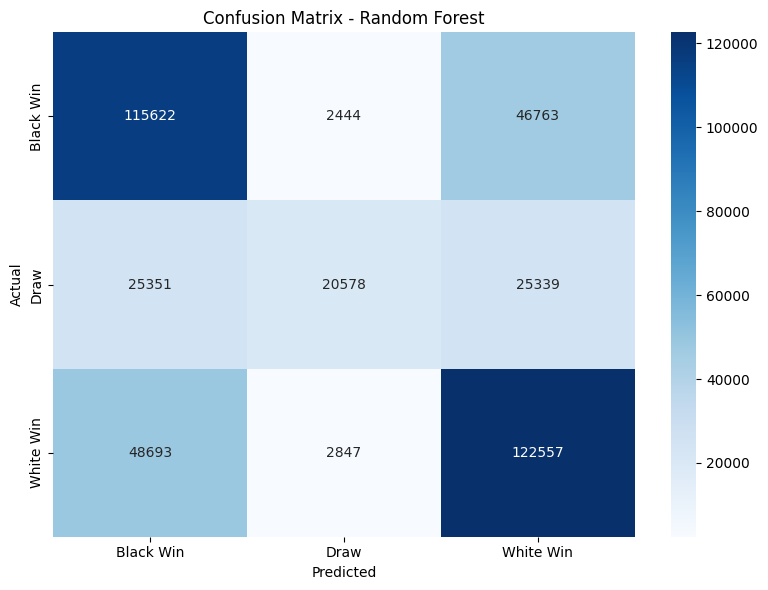

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

### 7. Feature Importance

                  Feature  Importance
10    material_diff_early    0.158307
4               AvgRating    0.096316
6    WhiteRatingAdvantage    0.094357
0                WhiteElo    0.089119
1                BlackElo    0.083298
32          activity_diff    0.060101
13     capture_diff_early    0.050535
3              RatingDiff    0.049378
5      WhiteIsHigherRated    0.031469
16  aggression_diff_early    0.027691
28       w_piece_activity    0.024315
29       b_piece_activity    0.024010
9        b_material_early    0.022970
8        w_material_early    0.022114
15     b_aggression_early    0.014622
14     w_aggression_early    0.012631
7                   ECOID    0.012366
2             EventTypeID    0.011409
27           early_checks    0.011045
31   total_captures_early    0.010896
19            center_diff    0.010698
12       b_captures_early    0.010654
11       w_captures_early    0.010311
26         b_checks_early    0.009200
22       development_diff    0.008230
18       b_c

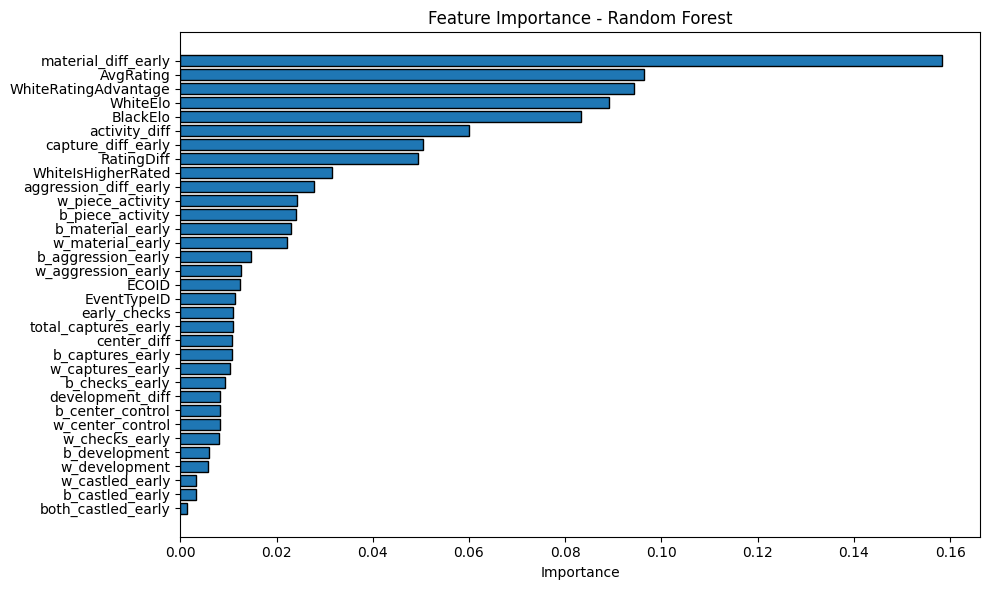

In [9]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], edgecolor="black")
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()